<a href="https://colab.research.google.com/github/Tongue923/Load_forecasting/blob/main/load_forecasting_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mount the drive**


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# **Import data from google drive**



In [2]:
ROOT_DIR = '/content/drive/My Drive/fyp'


In [3]:
import pandas as pd

data = pd.read_excel(f"{ROOT_DIR}/data/malaysia_all_data_for_paper.xlsx" )


In [4]:
data

,date,time,temperature ©,humidity(%),holiday,load
0,2009-01-01,01:00:00,24,100,0,30360
1,2009-01-01,02:00:00,24,100,0,29155
2,2009-01-01,03:00:00,24,94,0,28086
3,2009-01-01,04:00:00,24,94,0,28031
4,2009-01-01,05:00:00,24,94,0,27730
...,...,...,...,...,...,...
17515,2010-12-31,20:00:00,26,89,0,53819
17516,2010-12-31,21:00:00,26,83,0,51543
17517,2010-12-31,22:00:00,25,89,0,44961
17518,2010-12-31,23:00:00,24,94,0,38484


# **Plot graph**


In [5]:
df = pd.DataFrame(data)
data_sample = df.sample(n=3000).sort_values(by='date')


In [6]:
data_sample['datetime'] = pd.to_datetime(data_sample['date'].astype(str) + ' ' + data_sample['time'].astype(str))


Text(0, 0.5, 'load')

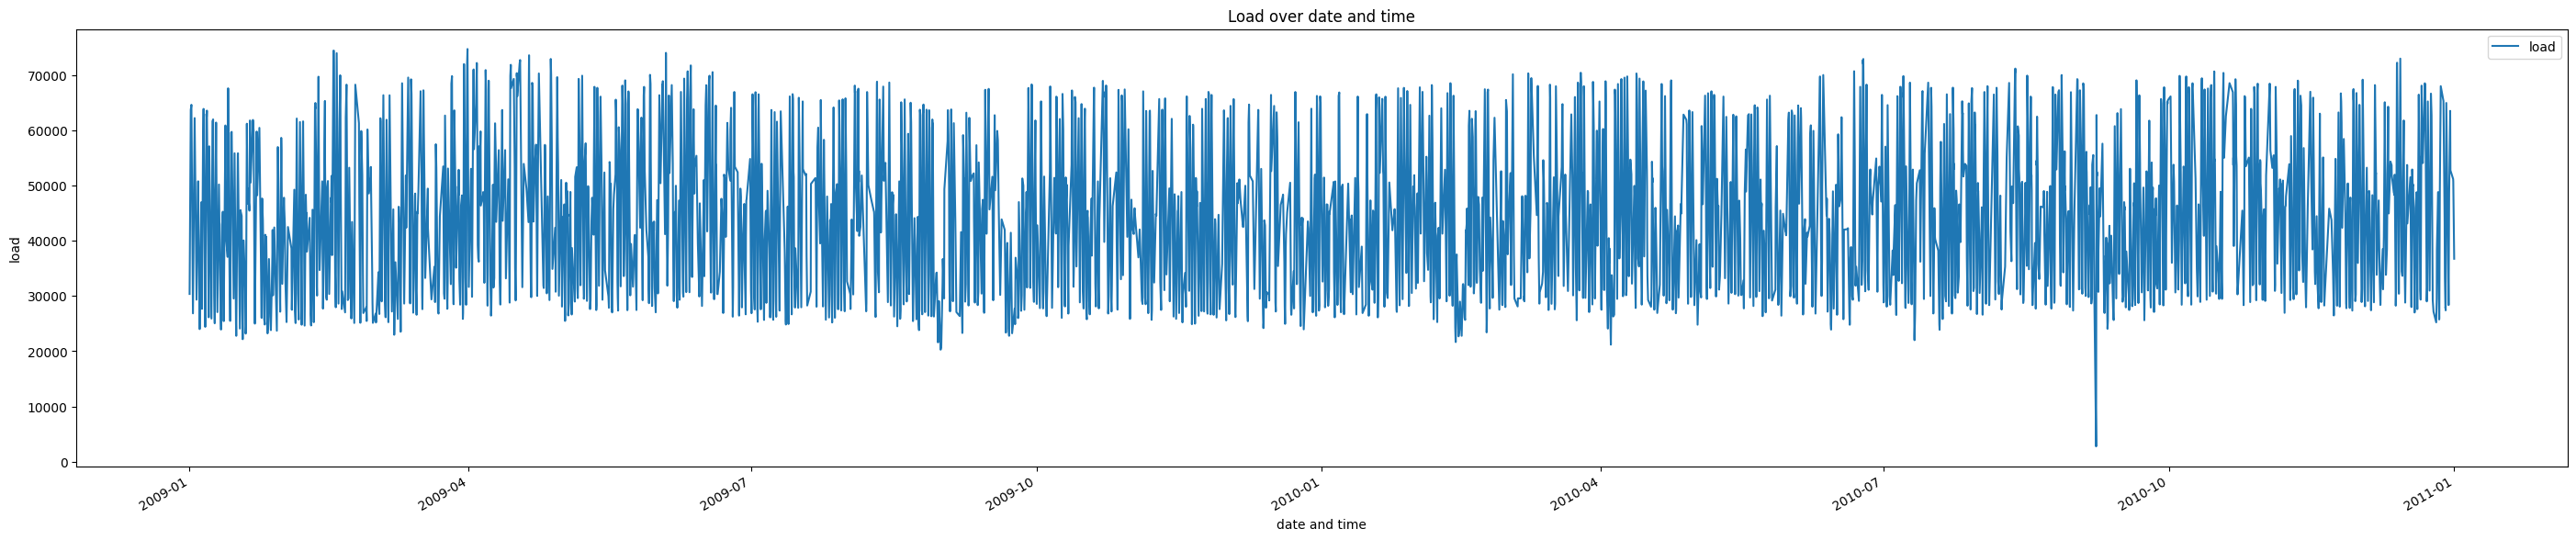

In [7]:
plt_data_sample = data_sample.plot(x='datetime', y='load',figsize=(35,7))
plt_data_sample.set_title("Load over date and time")
plt_data_sample.set_xlabel("date and time")
plt_data_sample.set_ylabel("load")


# **Prepare data**


In [8]:
data['date'] = pd.to_datetime(data['date'].astype(str) + ' ' + data['time'].astype(str))
data = data.drop(['time'], axis=1)


In [9]:
data

,date,temperature ©,humidity(%),holiday,load
0,2009-01-01 01:00:00,24,100,0,30360
1,2009-01-01 02:00:00,24,100,0,29155
2,2009-01-01 03:00:00,24,94,0,28086
3,2009-01-01 04:00:00,24,94,0,28031
4,2009-01-01 05:00:00,24,94,0,27730
...,...,...,...,...,...
17515,2010-12-31 20:00:00,26,89,0,53819
17516,2010-12-31 21:00:00,26,83,0,51543
17517,2010-12-31 22:00:00,25,89,0,44961
17518,2010-12-31 23:00:00,24,94,0,38484


In [10]:
import numpy as np

data.index = pd.to_datetime(data['date'], format='%Y.%m.%d %H:%M:%S')
data

,date,temperature ©,humidity(%),holiday,load
date,,,,,
2009-01-01 01:00:00,2009-01-01 01:00:00,24,100,0,30360
2009-01-01 02:00:00,2009-01-01 02:00:00,24,100,0,29155
2009-01-01 03:00:00,2009-01-01 03:00:00,24,94,0,28086
2009-01-01 04:00:00,2009-01-01 04:00:00,24,94,0,28031
2009-01-01 05:00:00,2009-01-01 05:00:00,24,94,0,27730
...,...,...,...,...,...
2010-12-31 20:00:00,2010-12-31 20:00:00,26,89,0,53819
2010-12-31 21:00:00,2010-12-31 21:00:00,26,83,0,51543
2010-12-31 22:00:00,2010-12-31 22:00:00,25,89,0,44961


In [11]:
df = data.drop(['date'], axis=1)
df

,temperature ©,humidity(%),holiday,load
date,,,,
2009-01-01 01:00:00,24,100,0,30360
2009-01-01 02:00:00,24,100,0,29155
2009-01-01 03:00:00,24,94,0,28086
2009-01-01 04:00:00,24,94,0,28031
2009-01-01 05:00:00,24,94,0,27730
...,...,...,...,...
2010-12-31 20:00:00,26,89,0,53819
2010-12-31 21:00:00,26,83,0,51543
2010-12-31 22:00:00,25,89,0,44961


In [12]:
def df_to_X_y(df, window_size = 6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][3]
    y.append(label)
  return np.array(X), np.array(y)

In [13]:
x, y = df_to_X_y(df)
x, x.shape, y, y.shape

(array([[[24, 100, 0, 30360],
         [24, 100, 0, 29155],
         [24, '94\xa0', 0, 28086],
         [24, '94\xa0', 0, 28031],
         [24, '94\xa0', 0, 27730],
         [24, '94\xa0', 0, 30490]],
 
        [[24, 100, 0, 29155],
         [24, '94\xa0', 0, 28086],
         [24, '94\xa0', 0, 28031],
         [24, '94\xa0', 0, 27730],
         [24, '94\xa0', 0, 30490],
         [24, '94\xa0', 0, 37081]],
 
        [[24, '94\xa0', 0, 28086],
         [24, '94\xa0', 0, 28031],
         [24, '94\xa0', 0, 27730],
         [24, '94\xa0', 0, 30490],
         [24, '94\xa0', 0, 37081],
         [24, '94\xa0', 0, 46975]],
 
        ...,
 
        [[30, '70\xa0', 0, 51163],
         [29, '74\xa0', 0, 50675],
         [28, '79\xa0', 0, 50164],
         [27, '89\xa0', 0, 50947],
         [26, '89\xa0', 0, 53819],
         [26, '83\xa0', 0, 51543]],
 
        [[29, '74\xa0', 0, 50675],
         [28, '79\xa0', 0, 50164],
         [27, '89\xa0', 0, 50947],
         [26, '89\xa0', 0, 53819],
        

In [14]:
x = np.asarray(x).astype(np.float32)
y = np.asarray(y).astype(np.float32)

In [15]:
x, x.shape, y, y.shape

(array([[[2.4000e+01, 1.0000e+02, 0.0000e+00, 3.0360e+04],
         [2.4000e+01, 1.0000e+02, 0.0000e+00, 2.9155e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.8086e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.8031e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.7730e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 3.0490e+04]],
 
        [[2.4000e+01, 1.0000e+02, 0.0000e+00, 2.9155e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.8086e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.8031e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.7730e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 3.0490e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 3.7081e+04]],
 
        [[2.4000e+01, 9.4000e+01, 0.0000e+00, 2.8086e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.8031e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.7730e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 3.0490e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 3.70

# **Split data for training, validation and testing**

In [16]:
from sklearn.model_selection import train_test_split


In [17]:
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2, shuffle=False)

In [18]:
x_train, y_train, x_val, y_val, x_test, y_test

(array([[[2.4000e+01, 1.0000e+02, 0.0000e+00, 3.0360e+04],
         [2.4000e+01, 1.0000e+02, 0.0000e+00, 2.9155e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.8086e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.8031e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.7730e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 3.0490e+04]],
 
        [[2.4000e+01, 1.0000e+02, 0.0000e+00, 2.9155e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.8086e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.8031e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.7730e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 3.0490e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 3.7081e+04]],
 
        [[2.4000e+01, 9.4000e+01, 0.0000e+00, 2.8086e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.8031e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 2.7730e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 3.0490e+04],
         [2.4000e+01, 9.4000e+01, 0.0000e+00, 3.70

# **Preprocess data**

In [19]:
temp_training_mean = np.mean(x_train[:, :, 3])
temp_training_std = np.std(x_train[:, :, 3])

def preprocess(X):
  X[:, :, 3] = (X[:, :, 3] - temp_training_mean) / temp_training_std
  return X

In [20]:
preprocess(x_train)
preprocess(x_val)
preprocess(x_test)

array([[[ 2.7000000e+01,  8.4000000e+01,  1.0000000e+00,  3.6193055e-01],
        [ 2.6000000e+01,  8.9000000e+01,  1.0000000e+00, -3.9405671e-01],
        [ 2.6000000e+01,  8.9000000e+01,  1.0000000e+00, -6.3010716e-01],
        [ 2.5000000e+01,  9.4000000e+01,  1.0000000e+00, -7.9419523e-01],
        [ 2.5000000e+01,  9.4000000e+01,  1.0000000e+00, -8.9306527e-01],
        [ 2.5000000e+01,  9.4000000e+01,  1.0000000e+00, -9.7531796e-01]],

       [[ 2.6000000e+01,  8.9000000e+01,  1.0000000e+00, -3.9405671e-01],
        [ 2.6000000e+01,  8.9000000e+01,  1.0000000e+00, -6.3010716e-01],
        [ 2.5000000e+01,  9.4000000e+01,  1.0000000e+00, -7.9419523e-01],
        [ 2.5000000e+01,  9.4000000e+01,  1.0000000e+00, -8.9306527e-01],
        [ 2.5000000e+01,  9.4000000e+01,  1.0000000e+00, -9.7531796e-01],
        [ 2.4000000e+01,  1.0000000e+02,  1.0000000e+00, -1.0498528e+00]],

       [[ 2.6000000e+01,  8.9000000e+01,  1.0000000e+00, -6.3010716e-01],
        [ 2.5000000e+01,  9.400000

In [21]:
x_train.shape, x_val.shape, x_test.shape

((11208, 6, 4), (2803, 6, 4), (3503, 6, 4))

In [22]:

def preprocess1(Y):
  Y[:] = (Y[:] - temp_training_mean) / temp_training_std
  return Y

In [23]:
preprocess1(y_train)
preprocess1(y_val)
preprocess1(y_test)

array([-1.0498528 , -1.142952  , -1.1491401 , ...,  0.06837973,
       -0.38195866, -0.5039818 ], dtype=float32)

In [24]:
y_train.shape, y_val.shape, y_test.shape

((11208,), (2803,), (3503,))

# **Train and validate data**

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam



In [26]:
x_train, x_train.shape, y_train, y_train.shape, x_val, x_val.shape, y_val, y_val.shape

(array([[[ 24.        , 100.        ,   0.        ,  -0.9468111 ],
         [ 24.        , 100.        ,   0.        ,  -1.0305934 ],
         [ 24.        ,  94.        ,   0.        ,  -1.1049197 ],
         [ 24.        ,  94.        ,   0.        ,  -1.1087438 ],
         [ 24.        ,  94.        ,   0.        ,  -1.129672  ],
         [ 24.        ,  94.        ,   0.        ,  -0.93777233]],
 
        [[ 24.        , 100.        ,   0.        ,  -1.0305934 ],
         [ 24.        ,  94.        ,   0.        ,  -1.1049197 ],
         [ 24.        ,  94.        ,   0.        ,  -1.1087438 ],
         [ 24.        ,  94.        ,   0.        ,  -1.129672  ],
         [ 24.        ,  94.        ,   0.        ,  -0.93777233],
         [ 24.        ,  94.        ,   0.        ,  -0.47950765]],
 
        [[ 24.        ,  94.        ,   0.        ,  -1.1049197 ],
         [ 24.        ,  94.        ,   0.        ,  -1.1087438 ],
         [ 24.        ,  94.        ,   0.        ,  -1.

In [27]:

model1 = Sequential()
model1.add(InputLayer((6, 4)))
model1.add(LSTM(256, return_sequences=False))
model1.add(Dropout(0.5))
model1.add(Dense(256, 'relu'))
model1.add(Flatten())
model1.add(Dense(1, 'linear'))



In [28]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               267264    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 256)               65792     
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 333313 (1.27 MB)
Trainable params: 333313 (1.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model1.compile(loss = MeanSquaredError(), optimizer=Adam(learning_rate=0.0005), metrics=[RootMeanSquaredError()])
cp1 = ModelCheckpoint(ROOT_DIR +'/model1/', save_best_only=True)


In [30]:
model1.fit(x_train, y_train, epochs=30, batch_size=1, validation_data=(x_val, y_val), callbacks=[cp1])

Epoch 1/30
11208/11208 [==============================] - 158s 14ms/step - loss: 0.1861 - root_mean_squared_error: 0.4314 - val_loss: 0.0407 - val_root_mean_squared_error: 0.2018
Epoch 2/30
11208/11208 [==============================] - 143s 13ms/step - loss: 0.0619 - root_mean_squared_error: 0.2488 - val_loss: 0.0372 - val_root_mean_squared_error: 0.1928
Epoch 3/30
11208/11208 [==============================] - 142s 13ms/step - loss: 0.0493 - root_mean_squared_error: 0.2220 - val_loss: 0.0213 - val_root_mean_squared_error: 0.1460
Epoch 4/30
11208/11208 [==============================] - 141s 13ms/step - loss: 0.0409 - root_mean_squared_error: 0.2022 - val_loss: 0.0407 - val_root_mean_squared_error: 0.2018
Epoch 5/30
11208/11208 [==============================] - 137s 12ms/step - loss: 0.0351 - root_mean_squared_error: 0.1874 - val_loss: 0.0268 - val_root_mean_squared_error: 0.1638
Epoch 6/30
11208/11208 [==============================] - 133s 12ms/step - loss: 0.0322 - root_mean_squar

# **Test Model**

In [31]:
x_test, x_test.shape, y_test, y_test.shape

(array([[[ 2.7000000e+01,  8.4000000e+01,  1.0000000e+00,  3.6193055e-01],
         [ 2.6000000e+01,  8.9000000e+01,  1.0000000e+00, -3.9405671e-01],
         [ 2.6000000e+01,  8.9000000e+01,  1.0000000e+00, -6.3010716e-01],
         [ 2.5000000e+01,  9.4000000e+01,  1.0000000e+00, -7.9419523e-01],
         [ 2.5000000e+01,  9.4000000e+01,  1.0000000e+00, -8.9306527e-01],
         [ 2.5000000e+01,  9.4000000e+01,  1.0000000e+00, -9.7531796e-01]],
 
        [[ 2.6000000e+01,  8.9000000e+01,  1.0000000e+00, -3.9405671e-01],
         [ 2.6000000e+01,  8.9000000e+01,  1.0000000e+00, -6.3010716e-01],
         [ 2.5000000e+01,  9.4000000e+01,  1.0000000e+00, -7.9419523e-01],
         [ 2.5000000e+01,  9.4000000e+01,  1.0000000e+00, -8.9306527e-01],
         [ 2.5000000e+01,  9.4000000e+01,  1.0000000e+00, -9.7531796e-01],
         [ 2.4000000e+01,  1.0000000e+02,  1.0000000e+00, -1.0498528e+00]],
 
        [[ 2.6000000e+01,  8.9000000e+01,  1.0000000e+00, -6.3010716e-01],
         [ 2.500000

In [32]:
from tensorflow.keras.models import load_model
model_lstm_1layer = load_model(ROOT_DIR+'/model1/')

In [33]:
from sklearn.metrics import mean_squared_error as mse
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure


def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions': predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start :end])
  plt.plot(df['Actuals'][start: end])
  figure(figsize=(60 , 650), dpi=80)
  return df, mse(predictions, y)

110/110 [==============================] - 1s 8ms/step


(      Predictions   Actuals
 0       -1.126968 -1.049853
 1       -1.155655 -1.142952
 2       -1.206423 -1.149140
 3       -1.168232 -1.032888
 4       -0.923875 -1.063898
 ...           ...       ...
 3498     0.456127  0.684266
 3499     0.698162  0.526019
 3500     0.096263  0.068380
 3501    -0.245393 -0.381959
 3502    -0.665389 -0.503982
 
 [3503 rows x 2 columns],
 0.02439276)

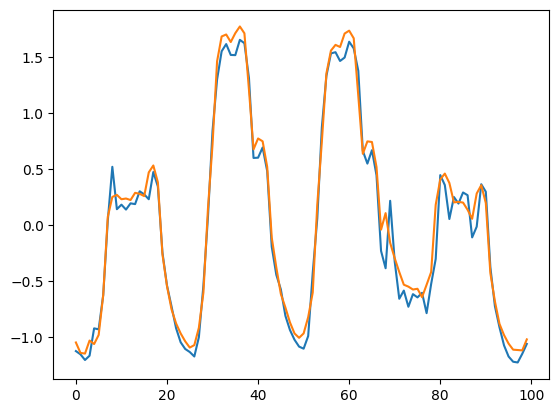

<Figure size 4800x52000 with 0 Axes>

In [34]:
plot_predictions1(model_lstm_1layer, x_test, y_test)

# **2-layer LSTM**

In [35]:

model2 = Sequential()
model2.add(InputLayer((6, 4)))
model2.add(LSTM(256, return_sequences=True))
model2.add(Dropout(0.5))
model2.add(Dense(256, 'relu'))
model2.add(LSTM(256, return_sequences=False))
model2.add(Dropout(0.5))
model2.add(Dense(256, 'relu'))
model2.add(Flatten())
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 6, 256)            267264    
                                                                 
 dropout_1 (Dropout)         (None, 6, 256)            0         
                                                                 
 lstm_2 (LSTM)               (None, 256)               525312    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [36]:
model2.compile(loss = MeanSquaredError(), optimizer=Adam(learning_rate=0.0005), metrics=[RootMeanSquaredError()])
cp2 = ModelCheckpoint(ROOT_DIR +'/model2/', save_best_only=True)


In [37]:
model2.fit(x_train, y_train, epochs=50, batch_size=1, validation_data=(x_val, y_val), callbacks=[cp2])

Epoch 1/30
11208/11208 [==============================] - 304s 27ms/step - loss: 0.1971 - root_mean_squared_error: 0.4440 - val_loss: 0.1031 - val_root_mean_squared_error: 0.3211
Epoch 2/30
11208/11208 [==============================] - 295s 26ms/step - loss: 0.0647 - root_mean_squared_error: 0.2544 - val_loss: 0.0349 - val_root_mean_squared_error: 0.1868
Epoch 3/30
11208/11208 [==============================] - 293s 26ms/step - loss: 0.0505 - root_mean_squared_error: 0.2247 - val_loss: 0.0478 - val_root_mean_squared_error: 0.2185
Epoch 4/30
11208/11208 [==============================] - 319s 28ms/step - loss: 0.0429 - root_mean_squared_error: 0.2072 - val_loss: 0.0264 - val_root_mean_squared_error: 0.1626
Epoch 5/30
11208/11208 [==============================] - 313s 28ms/step - loss: 0.0391 - root_mean_squared_error: 0.1978 - val_loss: 0.0305 - val_root_mean_squared_error: 0.1746
Epoch 6/30
11208/11208 [==============================] - 309s 28ms/step - loss: 0.0346 - root_mean_squar

110/110 [==============================] - 3s 16ms/step


(      Predictions   Actuals
 0       -1.021677 -1.049853
 1       -1.077879 -1.142952
 2       -1.079666 -1.149140
 3       -1.096776 -1.032888
 4       -1.039013 -1.063898
 ...           ...       ...
 3498     0.427168  0.684266
 3499     0.526596  0.526019
 3500    -0.097995  0.068380
 3501    -0.389304 -0.381959
 3502    -0.642880 -0.503982
 
 [3503 rows x 2 columns],
 0.030973274)

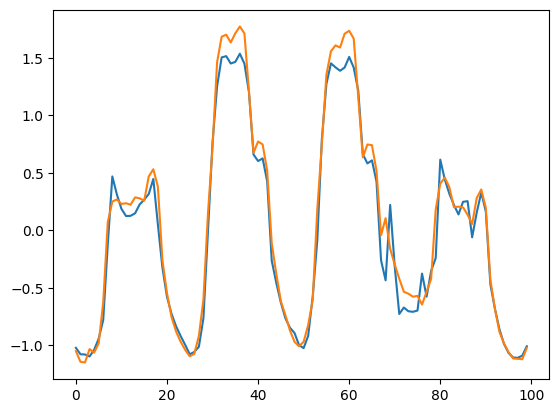

<Figure size 4800x52000 with 0 Axes>

In [38]:
model_lstm_2layer = load_model(ROOT_DIR+'/model2/')
plot_predictions1(model_lstm_2layer, x_test, y_test)

# **3-layer LSTM**

In [39]:
model3 = Sequential()
model3.add(InputLayer((6, 4)))
model3.add(LSTM(256, return_sequences=True))
model3.add(Dropout(0.5))
model2.add(Dense(256, 'relu'))
model3.add(LSTM(256, return_sequences=True))
model3.add(Dropout(0.5))
model2.add(Dense(256, 'relu'))
model3.add(LSTM(256, return_sequences=False))
model3.add(Dropout(0.5))
model3.add(Dense(256, 'relu'))
model3.add(Flatten())
model3.add(Dense(1, 'linear'))

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 6, 256)            267264    
                                                                 
 dropout_3 (Dropout)         (None, 6, 256)            0         
                                                                 
 lstm_4 (LSTM)               (None, 6, 256)            525312    
                                                                 
 dropout_4 (Dropout)         (None, 6, 256)            0         
                                                                 
 lstm_5 (LSTM)               (None, 256)               525312    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 256)              

In [40]:
model3.compile(loss = MeanSquaredError(), optimizer=Adam(learning_rate=0.0005), metrics=[RootMeanSquaredError()])
cp3 = ModelCheckpoint(ROOT_DIR +'/model3/', save_best_only=True)

In [41]:
model3.fit(x_train, y_train, epochs=30, batch_size=1, validation_data=(x_val, y_val), callbacks=[cp3])

Epoch 1/30
11208/11208 [==============================] - 469s 41ms/step - loss: 0.2135 - root_mean_squared_error: 0.4621 - val_loss: 0.0625 - val_root_mean_squared_error: 0.2499
Epoch 2/30
11208/11208 [==============================] - 487s 43ms/step - loss: 0.0705 - root_mean_squared_error: 0.2655 - val_loss: 0.0429 - val_root_mean_squared_error: 0.2071
Epoch 3/30
11208/11208 [==============================] - 460s 41ms/step - loss: 0.0550 - root_mean_squared_error: 0.2345 - val_loss: 0.0504 - val_root_mean_squared_error: 0.2245
Epoch 4/30
11208/11208 [==============================] - 470s 42ms/step - loss: 0.0468 - root_mean_squared_error: 0.2164 - val_loss: 0.0258 - val_root_mean_squared_error: 0.1607
Epoch 5/30
11208/11208 [==============================] - 492s 44ms/step - loss: 0.0416 - root_mean_squared_error: 0.2038 - val_loss: 0.0229 - val_root_mean_squared_error: 0.1512
Epoch 6/30
11208/11208 [==============================] - 475s 42ms/step - loss: 0.0386 - root_mean_squar

110/110 [==============================] - 4s 23ms/step


(      Predictions   Actuals
 0       -1.090365 -1.049853
 1       -1.109098 -1.142952
 2       -1.116098 -1.149140
 3       -1.117070 -1.032888
 4       -1.020687 -1.063898
 ...           ...       ...
 3498     0.481685  0.684266
 3499     0.557191  0.526019
 3500    -0.166554  0.068380
 3501    -0.480673 -0.381959
 3502    -0.671920 -0.503982
 
 [3503 rows x 2 columns],
 0.035742804)

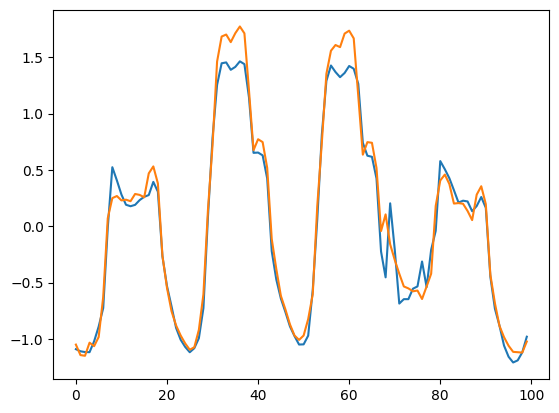

<Figure size 4800x52000 with 0 Axes>

In [42]:
model_lstm_3layer = load_model(ROOT_DIR+'/model3/')
plot_predictions1(model_lstm_3layer, x_test, y_test)

# **Comparison between different models**

In [43]:
from matplotlib.pyplot import legend

def plot_predictions2(model1, model2, model3, X, y):
  predictions1 = model1.predict(X).flatten()
  predictions2 = model2.predict(X).flatten()
  predictions3 = model3.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions1': predictions1, 'Predictions2': predictions2, 'Predictions3': predictions3, 'Actuals':y})
  plt.plot(df['Predictions1'][3400 :])
  plt.plot(df['Predictions2'][3400 :])
  plt.plot(df['Predictions3'][3400 :])
  plt.plot(df['Actuals'][3400:])
  plt.legend(['LSTM_1layer', 'LSTM_2layer', 'LSTM_3layer', 'actual'])
  figure(figsize=(60 , 650), dpi=80)
  return df

110/110 [==============================] - 3s 23ms/step


,Predictions1,Predictions2,Predictions3,Actuals
0,-1.126968,-1.021677,-1.090365,-1.049853
1,-1.155655,-1.077879,-1.109098,-1.142952
2,-1.206423,-1.079666,-1.116098,-1.149140
3,-1.168232,-1.096776,-1.117070,-1.032888
4,-0.923875,-1.039013,-1.020687,-1.063898
...,...,...,...,...
3498,0.456127,0.427168,0.481685,0.684266
3499,0.698162,0.526596,0.557191,0.526019
3500,0.096263,-0.097995,-0.166554,0.068380
3501,-0.245393,-0.389304,-0.480673,-0.381959


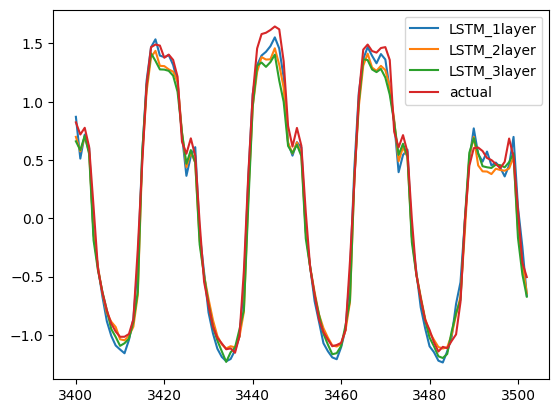

<Figure size 4800x52000 with 0 Axes>

In [44]:
plot_predictions2(model_lstm_1layer, model_lstm_2layer, model_lstm_3layer, x_test, y_test)

In [45]:
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [46]:
def rmse(y_true, y_pred):
  return np.sqrt(mse(y_true, y_pred))

In [47]:
def comparison(model1, model2, model3, X, y):
  model = ['lstm_1layer', 'lstm_2layer', 'lstm_3layer']
  predictions = []
  mape_i = []
  mse_i = []
  rmse_i = []
  mae_i = []
  predictions.append(model1.predict(X).flatten())
  predictions.append(model2.predict(X).flatten())
  predictions.append(model3.predict(X).flatten())

  for i in range(len(predictions)):
    mape_i.append(mape(predictions[i], y)*100)
    mse_i.append(mse(predictions[i], y))
    rmse_i.append(rmse(predictions[i], y))
    mae_i.append(mae(predictions[i], y))
    i+=1

  df = pd.DataFrame(data={'Predictions': model, 'MAPE(%)': mape_i, 'MSE': mse_i, 'RMSE': rmse_i, 'MAE': mae_i})


  return df

In [48]:
comparison(model_lstm_1layer, model_lstm_2layer, model_lstm_3layer, x_test, y_test)

110/110 [==============================] - 3s 23ms/step


,Predictions,MAPE(%),MSE,RMSE,MAE
0,lstm_1layer,48.085716,0.024393,0.156182,0.101025
1,lstm_2layer,36.815262,0.030973,0.175992,0.112297
2,lstm_3layer,291.072488,0.035743,0.189058,0.122149
